## Dever 1
*Thiago Laidler Vidal Cunha*


Astroestatística ON 2024.2

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy.units as u
import math
import scipy.stats as stats
from tqdm import tqdm 
import time
import multiprocessing as mp
from scipy.stats import norm
from scipy.stats import poisson
from scipy.optimize import curve_fit
import random
import scipy.special as sp
from scipy.special import gamma
from scipy.integrate import quad

**1)**

Tome uma distribuição normal com média igual a 100 e variância igual a 10, ou seja, N (100, √10). Produza N amostras com 8 pontos de dados cada, assumindo tal distribuição, e prove o teorema do limite central usando essas amostras.

In [2]:
def TCL_analysis(data_series, n_samples = 100000 , sample_size = 2):
    # Simulação da distribuição de médias amostrais
    nova_distribuicao = np.array([])

    for i in range(n_samples):
        indices = np.random.randint(0, len(data_series), sample_size)
        nova_distribuicao = np.append(nova_distribuicao, data_series[indices].mean())
    #TODO: adicionar verificação para saber se a distribuição é normal -> amostras devem ser de tamanho tal que seja o menor possivel e suficiente para que a distribuição seja menor
    # Visualização da distribuição
    plt.hist(nova_distribuicao, color='gray', bins='auto')
    plt.ylabel('Frequência', fontsize=15)
    plt.xlabel('Valor Médio', fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.axvline(np.mean(nova_distribuicao), color='r', ls='--', lw=2, label='Média')
    plt.axvline(np.mean(nova_distribuicao) - np.std(nova_distribuicao), color='k', ls='--', lw=2, label='Desvio padrão')
    plt.axvline(np.mean(nova_distribuicao) + np.std(nova_distribuicao), color='k', ls='--', lw=2)
    plt.legend()
    plt.show()

    return np.mean(nova_distribuicao), np.mean(nova_distribuicao) - 3*np.std(nova_distribuicao), np.mean(nova_distribuicao) + 3*np.std(nova_distribuicao)

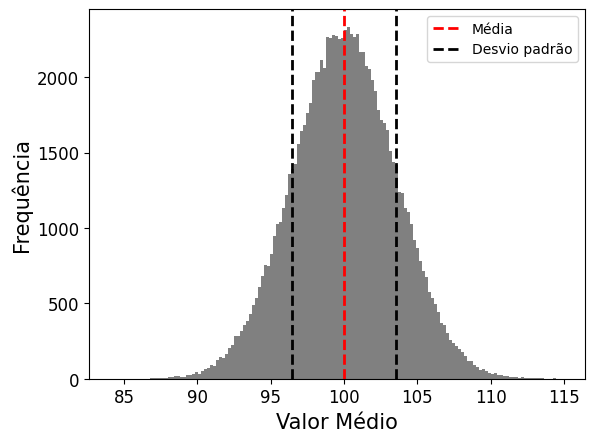

(100.00554824113827, 89.43856320671905, 110.57253327555749)

In [3]:
TCL_analysis(data_series=np.random.normal(100, 10, 10000), sample_size=8)

**2)**

Analisar dados de DR12 quasar (QSO) catalogue from the Sloan Digital Sky Survey (SDSS), que contém 297,301 QSOs identificados.

> Dados tirados de: https://www.sdss4.org/dr17/algorithms/boss-dr12-quasar-catalog/

In [5]:
from astropy.io import fits
fx = fits.open('DR12Q.fits', memmap=True)
d = fx[1].data

### HDU1: DR12Q BAL properties

EXTNAME="DR12Q_BAL" with a binary FITS table with the following columns:

 - Data Table Columns

| Column Name   | Type       | Units | Description                       |
|---------------|------------|-------|-----------------------------------|
| SDSS_NAME     | char[18]   | -     | SDSS-DR12 designation             |
| RA            | float64    | deg   | RA (J2000)                        |
| DEC           | float64    | deg   | DEC (J2000)                       |
| THING_ID      | int32      | -     | Unique identifier                 |
| PLATE         | int32      | -     | Plate number                      |
| MJD           | int32      | -     | Spectroscopic MJD                 |
| FIBERID       | int32      | -     | Fiber number                      |
| Z_VI          | float64    | -     | Visual inspection redshift        |
| Z_PIPE        | float64    | -     | BOSS pipeline redshift            |
| ERR_ZPIPE     | float64    | -     | Error on pipeline redshift        |
| ZWARNING      | int32      | -     | ZWarning flag                     |
| Z_PCA         | float64    | -     | PCA redshift                      |
| ERR_ZPCA      | float64    | -     | Error on PCA redshift             |
| SDSS_MORPHO   | int16      | -     | Morphology flag                   |
| BOSS_TARGET1  | int64      | -     | Main survey TS flag               |
...

In [19]:
redshift_data = fx[1].data['Z_PIPE'] #Z_PIPE: Redshift do pipeline BOSS

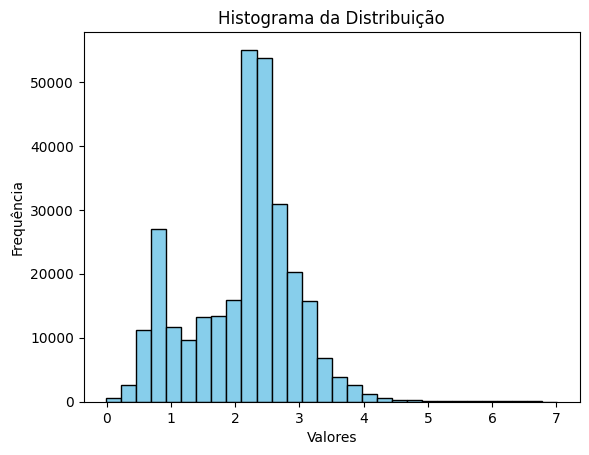

In [20]:
# Plotando o histograma
plt.hist(redshift_data, bins=30, color='skyblue', edgecolor='black')
plt.title('Histograma da Distribuição')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.show()

Média (mu): 2.1371426582336426
Desvio Padrão (std): 0.821794867515564


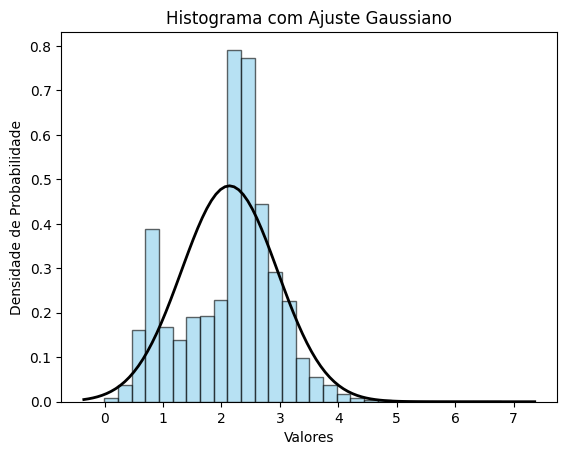

In [21]:
# Ajuste do modelo gaussiano
mu, std = norm.fit(redshift_data)

# Exibindo a média e desvio padrão ajustados
print(f"Média (mu): {mu}")
print(f"Desvio Padrão (std): {std}")

# Plotando o histograma e a curva de ajuste
plt.hist(redshift_data, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black')

# Curva Gaussiana ajustada
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title("Histograma com Ajuste Gaussiano")
plt.xlabel("Valores")
plt.ylabel("Densidade de Probabilidade")
plt.show()

Parâmetros da função Gamma ajustada: k = 2.03, theta = 0.95


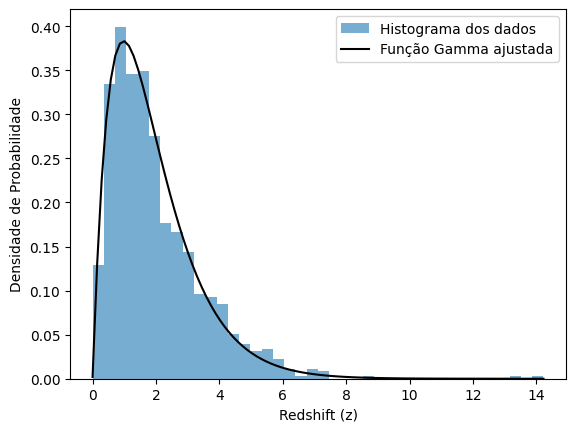

In [25]:
# Função Gamma
def gamma_func(z, k, theta):
    return (z**(k-1) * np.exp(-z/theta)) / (theta**k * gamma(k))

# Dados de exemplo para redshift
redshift_data = np.random.gamma(2, 1, 1000)  # exemplo de dados

# Calcula o histograma dos dados
hist, bin_edges = np.histogram(redshift_data, bins='auto', density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # centra os bins

# Ajusta a função Gamma aos dados do histograma
popt, _ = curve_fit(gamma_func, bin_centers, hist, p0=[2, 1])  # valores iniciais k=2, theta=1

# Obtém os melhores valores de k e theta
k_fit, theta_fit = popt
print(f"Parâmetros da função Gamma ajustada: k = {k_fit:.2f}, theta = {theta_fit:.2f}")

# Plota o histograma e a função Gamma ajustada
plt.hist(redshift_data, bins='auto', density=True, alpha=0.6, label='Histograma dos dados')
z_range = np.linspace(min(redshift_data), max(redshift_data), 100)
plt.plot(z_range, gamma_func(z_range, k_fit, theta_fit), label='Função Gamma ajustada', color='black')
plt.xlabel('Redshift (z)')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.show()

**3)**

Considere a compilação de Supernovas Tipo Ia (SN) nomeada Union2.1 enviada por e-mail. Considere também que as colunas do arquivo representam o nome da SN, redshift, módulo de distância e a incerteza do módulo de distância, respectivamente. Você pode negligenciar a última coluna por enquanto.

In [28]:
 np.genfromtxt("SCPUnion2.1_mu_vs_z.txt", comments='#', dtype=None, encoding=None)

array([('1993ah', 0.028488  , 35.34658339, 0.22390593, 1.28418942e-01),
       ('1993ag', 0.050043  , 36.68236792, 0.16682885, 1.28418942e-01),
       ('1993o', 0.052926  , 36.81769125, 0.15575591, 1.28418942e-01),
       ('1993b', 0.070086  , 37.44673654, 0.15846693, 1.28418942e-01),
       ('1992bs', 0.062668  , 37.48340935, 0.15609943, 1.28418942e-01),
       ('1992br', 0.087589  , 38.22905705, 0.18774568, 1.28418942e-01),
       ('1992bp', 0.078577  , 37.48816226, 0.15563566, 1.28418942e-01),
       ('1992bo', 0.017227  , 34.65436995, 0.19933718, 1.28418942e-01),
       ('1992bl', 0.042233  , 36.33645955, 0.16717404, 1.28418942e-01),
       ('1992bh', 0.045295  , 36.64027218, 0.16498125, 1.28418942e-01),
       ('1992bg', 0.03648   , 35.90532197, 0.17017495, 1.28418942e-01),
       ('1992bc', 0.019599  , 34.58521743, 0.18469122, 1.28418942e-01),
       ('1992aq', 0.100915  , 38.4567456 , 0.16733348, 1.28418942e-01),
       ('1992ag', 0.027342  , 35.08576569, 0.17551084, 1.28418942e

In [ ]:
# Constantes
c = 3e5  # Velocidade da luz em km/s
H0 = 70  # Constante de Hubble em km/s/Mpc

# Carregar dados do arquivo Union2.1 (assumindo que o arquivo está no formato .txt)
data = np.loadtxt("SCPUnion2.1_mu_vs_z.txt")
z_data = data[:, 1]  # Redshift
mu_data = data[:, 2]  # Módulo de distância observado
sigma_mu = data[:, 3]  # Incerteza do módulo de distância

In [ ]:
# Constantes
c = 3e5  # Velocidade da luz em km/s
H0 = 70  # Constante de Hubble em km/s/Mpc

# Carregar dados do arquivo Union2.1 (assumindo que o arquivo está no formato .txt)
data = np.loadtxt("Union2.1.txt")
z_data = data[:, 1]  # Redshift
mu_data = data[:, 2]  # Módulo de distância observado
sigma_mu = data[:, 3]  # Incerteza do módulo de distância

# Questão 3-a: Demonstrar a relação entre µ e dL
# µ = m - M = 5 log d - 5, onde d está em parsecs (pc)
# dL é a distância de luminosidade em Mpc
# 1 Mpc = 10^6 pc

def demonstracao_mu_dL():
  """
  Demonstração da relação µ = 5 log dL + 25.
  """
  print("Demonstração da relação entre µ e dL:")
  print("µ = m - M = 5 log d - 5 (d em pc)")
  print("dL = d / 10^6 (dL em Mpc)")
  print("Substituindo d na primeira equação:")
  print("µ = 5 log (dL * 10^6) - 5")
  print("µ = 5 log dL + 5 log 10^6 - 5")
  print("µ = 5 log dL + 30 - 5")
  print("µ = 5 log dL + 25")

demonstracao_mu_dL()

# Questão 3-b: Calcular o χ² para diferentes valores de Ωm

def integrando(z_linha, Omega_m):
  """
  Integrando da equação da distância de luminosidade.
  """
  return 1 / np.sqrt(Omega_m * (1 + z_linha)**3 + (1 - Omega_m))

def dL(z, Omega_m):
  """
  Calcula a distância de luminosidade dL.
  """
  integral, _ = quad(integrando, 0, z, args=(Omega_m,))
  return c / H0 * (1 + z) * integral

def mu_modelo(z, Omega_m):
  """
  Calcula o módulo de distância µ_modelo.
  """
  return 5 * np.log10(dL(z, Omega_m)) + 25

def calcular_chi2(Omega_m):
  """
  Calcula o χ² para um dado valor de Ωm.
  """
  mu_model = mu_modelo(z_data, Omega_m)
  chi2 = np.sum(((mu_model - mu_data) / sigma_mu)**2)
  return chi2

# Calcular o χ² para Ωm = 0.20, Ωm = 0.30 e Ωm = 0.40
Omega_m_valores = [0.20, 0.30, 0.40]
chi2_valores = []

for Omega_m in Omega_m_valores:
  chi2 = calcular_chi2(Omega_m)
  chi2_valores.append(chi2)
  print(f"χ² para Ωm = {Omega_m:.2f}: {chi2:.2f}")

# Encontrar o valor de Ωm com o menor χ²
melhor_Omega_m = Omega_m_valores[np.argmin(chi2_valores)]
print(f"\nO valor de Ωm que fornece o melhor ajuste (menor χ²) é: {melhor_Omega_m:.2f}")

#